# <font color='green'>Homework 3</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2023<br>
Course: Machine Learning<br>
</div>


***

<div class="alert alert-block alert-success">
<b>Author:</b><br>
Name: Taban Soleymani <br />
Student Number: 810100377
</div>

***

# <span style="color:purple">Importing Required Packages and Classes</span>

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math

from sklearn.metrics import confusion_matrix, classification_report
import itertools
%matplotlib inline

# <span style="color:purple">Question 8</span>

In [2]:
batch_size = 32 
num_classes = 10 
epochs = 100
data_augmentation = False

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('shape of x_train:', x_train.shape)
print('shape of y_train:', y_train.shape)
print('num of train samples: ', x_train.shape[0])
print('num of test samples', x_test.shape[0])

170498071/170498071 [==============================] - 3s 0us/step
shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
num of train samples:  50000
num of test samples 10000


In [4]:
classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Text(0.5, 1.0, 'cat')

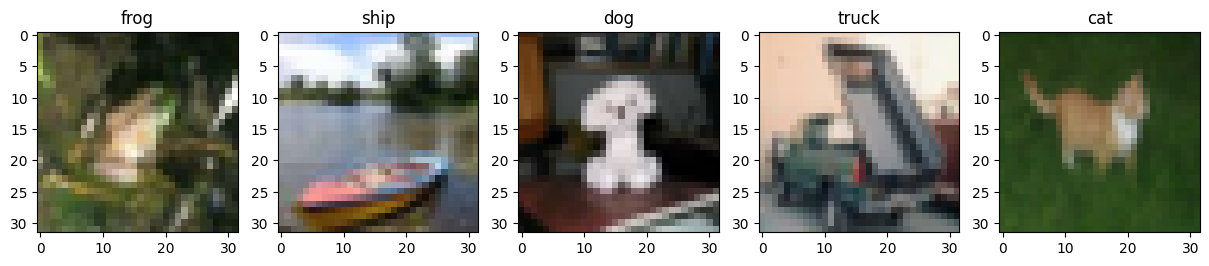

In [ ]:
import random 

plt.figure(figsize=(15,6))

index = random.randint(0, x_train.shape[0])
img = x_train[index]
plt.subplot(1, 5, 1)
plt.imshow(img)
plt.title(classes[int(y_train[index])])

index = random.randint(0, x_train.shape[0])
img = x_train[index]
plt.subplot(1, 5, 2)
plt.imshow(img)
plt.title(classes[int(y_train[index])])

index = random.randint(0, x_train.shape[0])
img = x_train[index]
plt.subplot(1, 5, 3)
plt.imshow(img)
plt.title(classes[int(y_train[index])])

index = random.randint(0, x_train.shape[0])
img = x_train[index]
plt.subplot(1, 5, 4)
plt.imshow(img)
plt.title(classes[int(y_train[index])])

index = random.randint(0, x_train.shape[0])
img = x_train[index]
plt.subplot(1, 5, 5)
plt.imshow(img)
plt.title(classes[int(y_train[index])])

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0

In [7]:
opt1 = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
opt2 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
opt3 = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)

In [8]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

By using RMSprop
Epoch 1/100
1257/1257 [==============================] - 20s 9ms/step - loss: 1.9013 - accuracy: 0.2935 - val_loss: 1.6476 - val_accuracy: 0.3999
Epoch 2/100
1257/1257 [==============================] - 10s 8ms/step - loss: 1.5899 - accuracy: 0.4162 - val_loss: 1.4201 - val_accuracy: 0.4847
Epoch 3/100
1257/1257 [==============================] - 10s 8ms/step - loss: 1.4367 - accuracy: 0.4783 - val_loss: 1.3359 - val_accuracy: 0.5159
Epoch 4/100
1257/1257 [==============================] - 10s 8ms/step - loss: 1.3364 - accuracy: 0.5188 - val_loss: 1.2593 - val_accuracy: 0.5487
Epoch 5/100
1257/1257 [==============================] - 9s 7ms/step - loss: 1.2560 - accuracy: 0.5496 - val_loss: 1.1667 - val_accuracy: 0.5845
Epoch 6/100
1257/1257 [==============================] - 10s 8ms/step - loss: 1.1871 - accuracy: 0.5782 - val_loss: 1.1468 - val_accuracy: 0.5887
Epoch 7/100
1257/1257 [==============================] - 11s 8ms/step - loss: 1.1258 - accuracy: 0.6003 - va

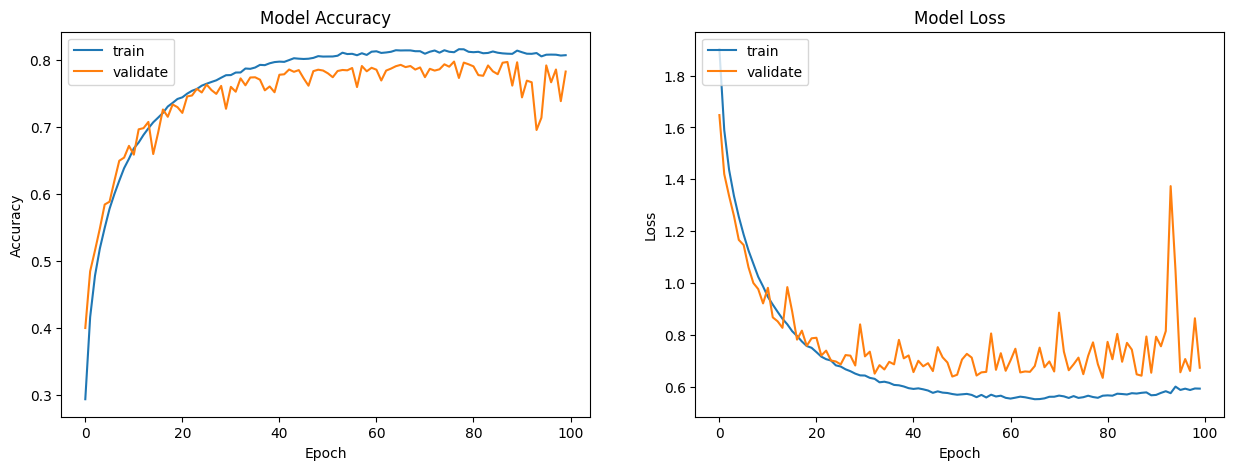

313/313 [==============================] - 1s 4ms/step - loss: 0.6882 - accuracy: 0.7793
Test loss: 0.6882326602935791
Test accuracy: 0.7792999744415283
313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.75      0.84      0.80      1000
           1       0.95      0.82      0.89      1000
           2       0.54      0.79      0.65      1000
           3       0.77      0.50      0.61      1000
           4       0.79      0.75      0.77      1000
           5       0.72      0.70      0.71      1000
           6       0.77      0.88      0.82      1000
           7       0.92      0.72      0.81      1000
           8       0.86      0.89      0.87      1000
           9       0.86      0.89      0.88      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



In [9]:
mask = np.random.rand(x_train.shape[0]) < 0.2
x_valid = x_train[mask]
y_valid = y_train[mask]
x_train = x_train[~mask]
y_train = y_train[~mask]


model.compile(loss='categorical_crossentropy',
              optimizer=opt1,
              metrics=['accuracy'])

print('By using RMSprop')

history = None  
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_valid, y_valid),
          shuffle=True)

print(history.history.keys())

plotmodelhistory(history)

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

pred = model.predict(x_test)

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

Y_pred_classes = np.argmax(pred, axis=1) 
Y_true = np.argmax(y_test, axis=1)

print(classification_report(Y_true, Y_pred_classes))

By using Adam
Epoch 1/100
1257/1257 [==============================] - 11s 8ms/step - loss: 1.7325 - accuracy: 0.4428 - val_loss: 1.0608 - val_accuracy: 0.6428
Epoch 2/100
1257/1257 [==============================] - 9s 7ms/step - loss: 1.0307 - accuracy: 0.6526 - val_loss: 1.0841 - val_accuracy: 0.6460
Epoch 3/100
1257/1257 [==============================] - 9s 7ms/step - loss: 0.9138 - accuracy: 0.6913 - val_loss: 0.7987 - val_accuracy: 0.7269
Epoch 4/100
1257/1257 [==============================] - 9s 7ms/step - loss: 0.8507 - accuracy: 0.7153 - val_loss: 0.8628 - val_accuracy: 0.7145
Epoch 5/100
1257/1257 [==============================] - 9s 7ms/step - loss: 0.8136 - accuracy: 0.7226 - val_loss: 0.7815 - val_accuracy: 0.7365
Epoch 6/100
1257/1257 [==============================] - 9s 7ms/step - loss: 0.7923 - accuracy: 0.7320 - val_loss: 0.7343 - val_accuracy: 0.7448
Epoch 7/100
1257/1257 [==============================] - 9s 7ms/step - loss: 0.7585 - accuracy: 0.7412 - val_loss: 

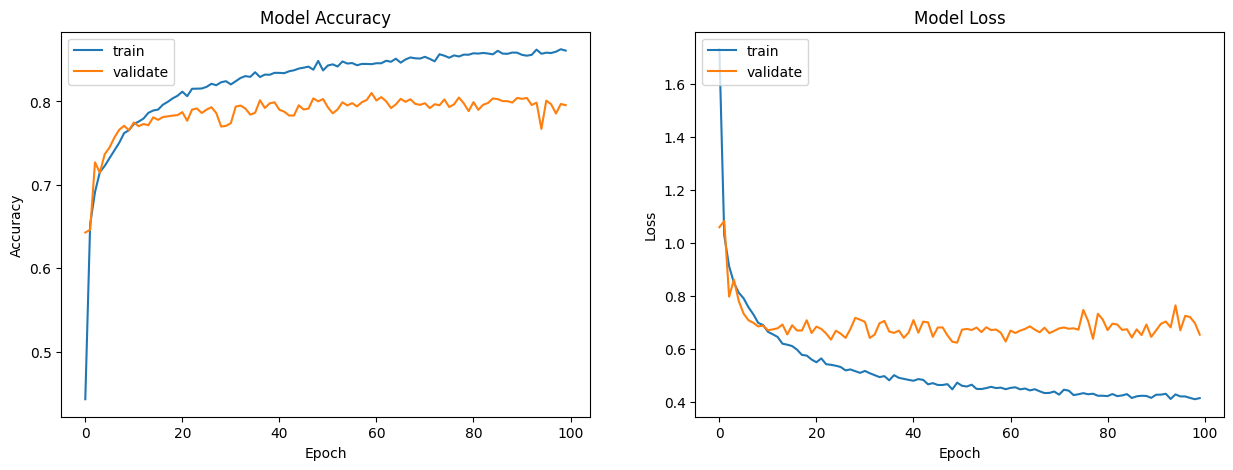

313/313 [==============================] - 1s 4ms/step - loss: 0.6767 - accuracy: 0.7912
Test loss: 0.6767081022262573
Test accuracy: 0.7911999821662903
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.88      0.79      1000
           1       0.92      0.90      0.91      1000
           2       0.78      0.63      0.69      1000
           3       0.58      0.67      0.62      1000
           4       0.79      0.76      0.77      1000
           5       0.77      0.64      0.70      1000
           6       0.77      0.88      0.82      1000
           7       0.84      0.84      0.84      1000
           8       0.90      0.86      0.88      1000
           9       0.89      0.87      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt2,
              metrics=['accuracy'])

print('By using Adam')

history = None  
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_valid, y_valid),
          shuffle=True)

print(history.history.keys())

plotmodelhistory(history)

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

pred = model.predict(x_test)

Y_pred_classes = np.argmax(pred, axis=1) 
Y_true = np.argmax(y_test, axis=1)

print(classification_report(Y_true, Y_pred_classes))

By using SGD
Epoch 1/100
1257/1257 [==============================] - 10s 7ms/step - loss: 0.8644 - accuracy: 0.7164 - val_loss: 0.7321 - val_accuracy: 0.7693
Epoch 2/100
1257/1257 [==============================] - 9s 7ms/step - loss: 0.6499 - accuracy: 0.7865 - val_loss: 0.7479 - val_accuracy: 0.7735
Epoch 3/100
1257/1257 [==============================] - 9s 7ms/step - loss: 0.5827 - accuracy: 0.8090 - val_loss: 0.7609 - val_accuracy: 0.7606
Epoch 4/100
1257/1257 [==============================] - 9s 7ms/step - loss: 0.5570 - accuracy: 0.8177 - val_loss: 0.7378 - val_accuracy: 0.7864
Epoch 5/100
1257/1257 [==============================] - 9s 7ms/step - loss: 0.5523 - accuracy: 0.8191 - val_loss: 0.6961 - val_accuracy: 0.7864
Epoch 6/100
1257/1257 [==============================] - 9s 7ms/step - loss: 0.5280 - accuracy: 0.8250 - val_loss: 0.7457 - val_accuracy: 0.7757
Epoch 7/100
1257/1257 [==============================] - 8s 6ms/step - loss: 0.5136 - accuracy: 0.8307 - val_loss: 0

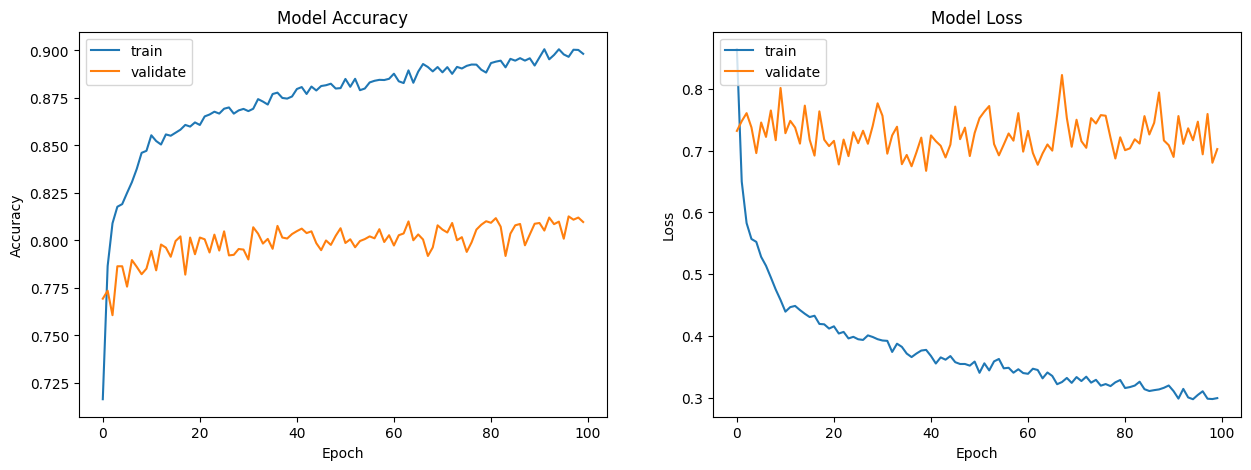

313/313 [==============================] - 1s 4ms/step - loss: 0.7159 - accuracy: 0.8092
Test loss: 0.7159162759780884
Test accuracy: 0.8091999888420105
313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.93      0.90      0.91      1000
           2       0.74      0.70      0.72      1000
           3       0.65      0.65      0.65      1000
           4       0.77      0.81      0.79      1000
           5       0.75      0.70      0.72      1000
           6       0.81      0.89      0.85      1000
           7       0.87      0.82      0.85      1000
           8       0.89      0.90      0.90      1000
           9       0.85      0.90      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt3,
              metrics=['accuracy'])

print('By using SGD')

history = None  
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_valid, y_valid),
          shuffle=True)

print(history.history.keys())

plotmodelhistory(history)

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

pred = model.predict(x_test)

Y_pred_classes = np.argmax(pred, axis=1) 
Y_true = np.argmax(y_test, axis=1)

print(classification_report(Y_true, Y_pred_classes))